# Prueba técnica W & J parte 5
- por David Ricardo Vivas Ordóñez

For this fifth challenge we will use [Huggingface Transformers](https://github.com/huggingface/transformers) pipeline feature to perform a quick binary sentiment analysis on the descriptions of our dataset.

## Data and dependency loading

In [1]:
### descarga del dataset
!gdown --id 18g0n5IrhTc_7uJlUTYjnavgnjkPrPVJp

Downloading...
From: https://drive.google.com/uc?id=18g0n5IrhTc_7uJlUTYjnavgnjkPrPVJp
To: /content/News_Category_Dataset_v2.json
83.9MB [00:01, 82.6MB/s]


In [2]:
!pip install -q transformers

     |████████████████████████████████| 1.3MB 16.5MB/s 
     |████████████████████████████████| 1.1MB 66.7MB/s 
     |████████████████████████████████| 890kB 63.9MB/s 
     |████████████████████████████████| 2.9MB 49.9MB/s 


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline
sns.set_theme()

In [4]:
df = pd.read_json('/content/News_Category_Dataset_v2.json', lines=True)

# merge duplicate and similar categories, uncomment for raw dataset
df['category'] = df['category'].map(lambda z :'ARTS & CULTURE' if z == 'ARTS' else z)
df['category'] = df['category'].map(lambda z :'ARTS & CULTURE' if z == 'CULTURE & ARTS' else z)
df['category'] = df['category'].map(lambda z :'THE WORLDPOST' if z == 'WORLDPOST' else z)
df['category'] = df['category'].map(lambda z :'PARENTING' if z == 'PARENTS' else z)
df['category'] = df['category'].map(lambda z :'ENVIRONMENT' if z == 'GREEN' else z)
df['category'] = df['category'].map(lambda z :'FOOD & DRINK' if z == 'TASTE' else z)
df['category'] = df['category'].map(lambda z :'STYLE & BEAUTY' if z == 'STYLE' else z)
df['category'] = df['category'].map(lambda z :'EDUCATION' if z == 'COLLEGE' else z)

n_categories = df.category.nunique()
df['category'] = pd.Categorical(df['category'])
df['category_label'] = df['category'].cat.codes
categories = df['category'].cat.categories
df = df.sort_index(axis=1)
df = df.sample(frac=1)
df.head()

,authors,category,category_label,date,headline,link,short_description
35901,"William Astore, ContributorWriter, History Pro...",POLITICS,19,2017-01-29,"For Shame, Mr. Trump",https://www.huffingtonpost.com/entry/for-shame...,Perhaps Trump will next appear before Christ o...
32867,Ron Dicker,COMEDY,3,2017-03-03,Watching Conan Sell Cheese On A Mexican Teleno...,https://www.huffingtonpost.com/entry/conan-mex...,Now if only he could remember his hat.
169910,"Courtney Macavinta, Contributor\nCourtney Maca...",WELLNESS,30,2012-12-27,From Hurricane Sandy to Sandy Hook: Are We Tot...,https://www.huffingtonpost.com/entry/self-empo...,Feeling powerlessness is real. Being powerless...
49689,Arthur Delaney,POLITICS,19,2016-08-25,Paul LePage Keeps A Binder Of Mugshots To Prov...,https://www.huffingtonpost.com/entry/paul-lepa...,The Maine governor said he started the collect...
112891,"Joshua Kusnick, ContributorCertified MLBPA agent",SPORTS,23,2014-09-04,Why Athletes Need to Exercise Their Influence:...,https://www.huffingtonpost.com/entry/why-athle...,"From my perspective as an agent, I really do n..."


## Analysis

Let's declare our pipeline

In [6]:
model_pipeline = pipeline('sentiment-analysis')

## using 
# model_pipeline.model
## we can see the details of the model loaded for the particular pipeline

Given that our dataset is really big, we will perform our analysis on a limited amount of samples per category

In [13]:
def analize_category(df, cat_id, sample_size):
    queries = list(df[df['category_label']==cat_id].sample(sample_size)['short_description'])
    return queries

def flatten_results(cat_results):
    '''
    flattens the array of dics 
    into an array of labels
    '''
    dummy = []
    for dic in cat_results:
        dummy.append(dic['label'])
    return dummy

In [14]:
results = []
sample_size = 30

for cat_id in range(n_categories):
    queries = analize_category(df, cat_id, sample_size = sample_size)
    cat_results = model_pipeline(queries)
    results.append(flatten_results(cat_results))

And count the ammount of positive and negative entries per category

In [15]:
binary_results = [list(map(lambda z: 1 if z == 'POSITIVE' else 0, item)) for item in results]
counts_results = []
for i in range(n_categories):
    _, counts = np.unique(np.sort(binary_results[i]), return_counts=True)
    counts_results.append(counts)

## Visualization

Now we can visualize our results using pie charts

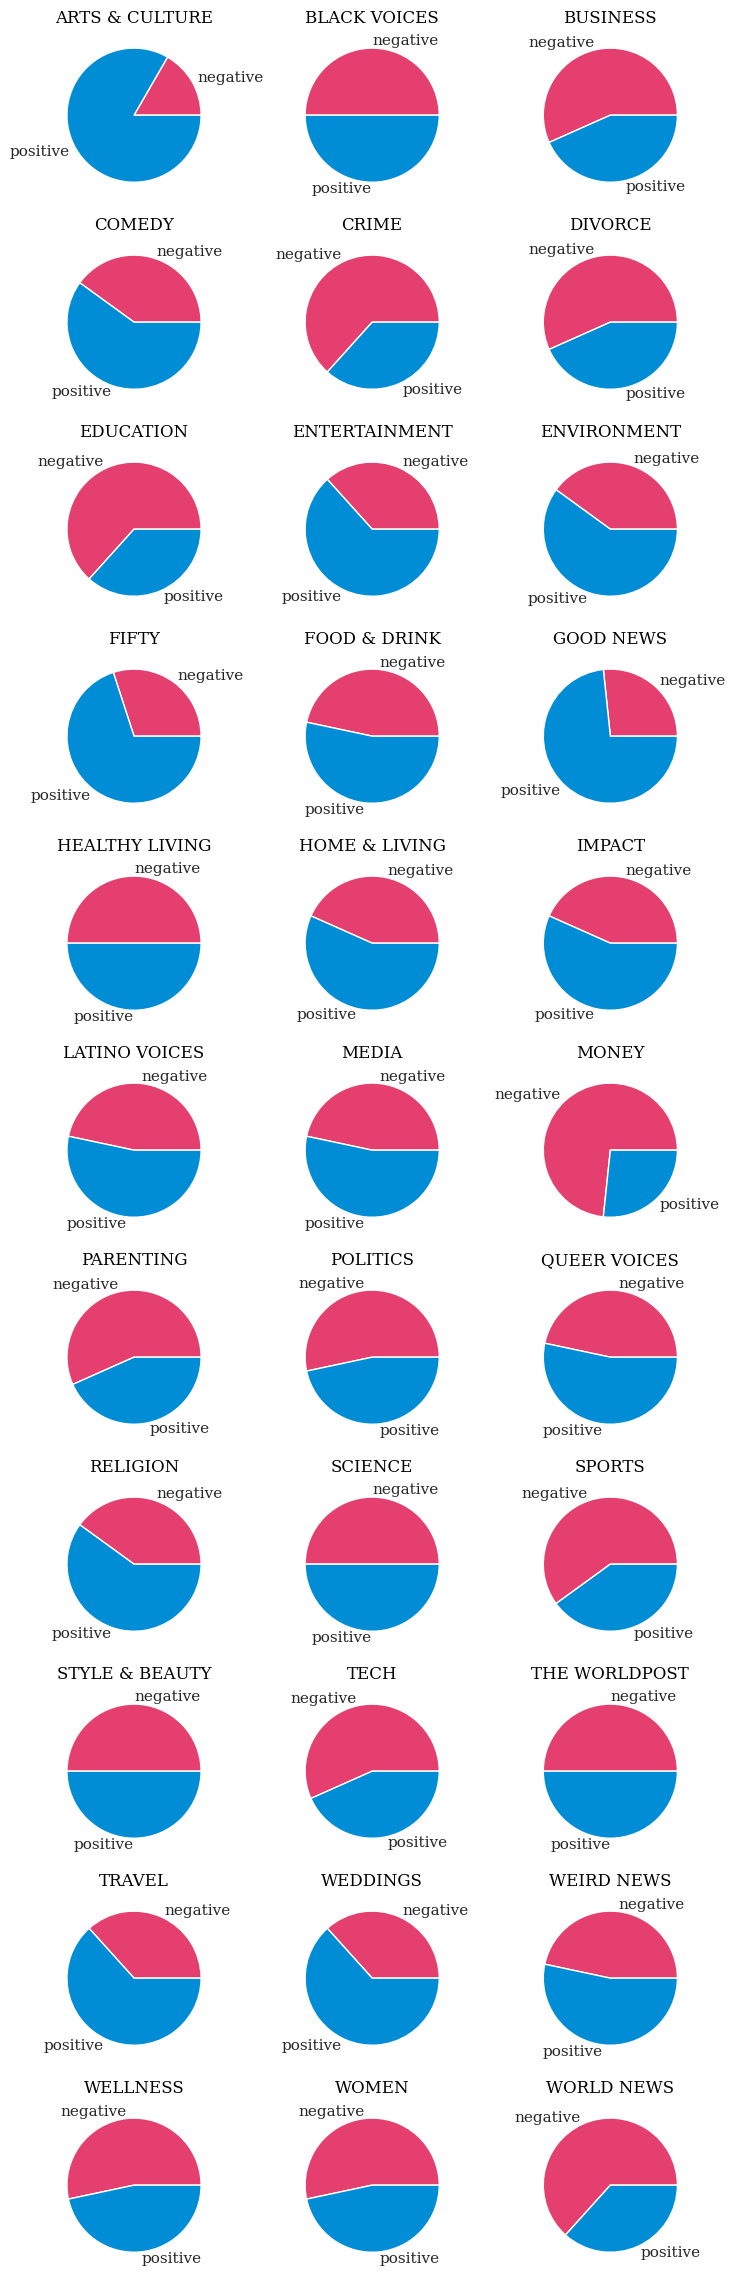

In [24]:
plt.rcParams["font.family"] = "serif"
plot_scale = 0.425

n_cols = 3
b_color = 'white'
f_color = 'black'

fig, axs = plt.subplots(ncols=n_cols, 
                        nrows=int(np.ceil(len(categories)/n_cols)), 
                        figsize=(18*plot_scale,54*plot_scale), 
                        dpi = 100, 
                        facecolor = b_color)
axs = axs.flatten() # for easer iteration

for i in range(len(categories)):

    axs[i].set_title(categories[i], color = f_color)
    axs[i].pie(counts_results[i], labels = ['negative', 'positive'], colors = ['#E43F6F', '#008DD5'])
    axs[i].axis('off')
    axs[i].set_title(categories[i])

axs[-1].axis('off')
   
plt.tight_layout()
plt.show()

As expected, categories such as crime are dominated by negative entries, while categories such as arts are dominated by positive entries.